In [1]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

if(!require(lmtest)) install.packages("lmtest")
library(lmtest)

if(!require(urca)) install.packages("urca")
library(urca)

if(!require(sandwich)) install.packages("sandwich")
library(sandwich)

if(!require(car)) install.packages("car")
library(car)

if(!require(carData)) install.packages("carData")
library(carData)

if(!require(forecast)) install.packages("forecast")
library(forecast)

if(!require(tseries)) install.packages("tseries")
library(tseries)

if(!require(dummy)) install.packages("dummy")
library(dummy)

if(!require(seasonal)) install.packages("seasonal")
library(seasonal)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.2"


Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: urca

Warning message:
"package 'urca' was built under R version 4.2.2"
Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
Loading required package: car

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: tseries

Warning message:
"package 'tseries' was buil

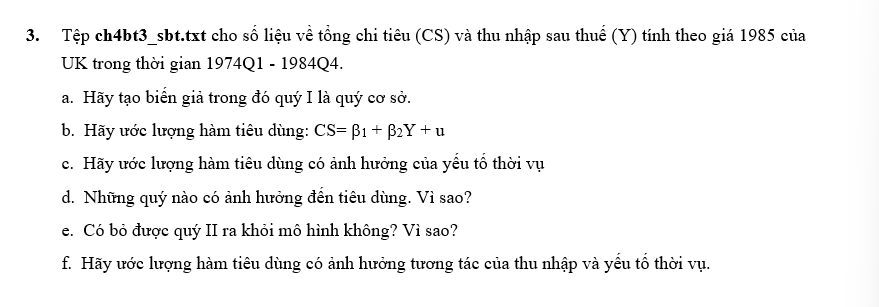

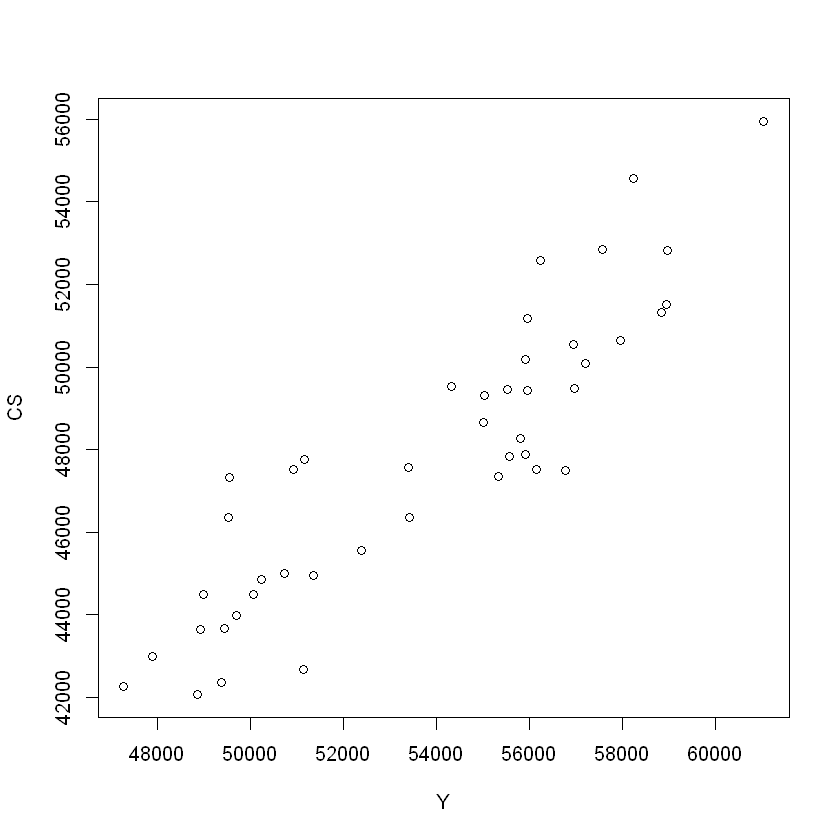

In [2]:
ch4bt3_sbt= read.table("data.txt",header=TRUE) 
CS=ch4bt3_sbt$CS
Y=ch4bt3_sbt$Y
plot(Y,CS,type="p")

##### a.  Hãy tạo biến giả

##### Mô hình không có hệ số chặn

In [3]:
ch4bt3_sbt$quarter <- rep(c("q1","q2","q3","q4"),11)
summary(lm(data=ch4bt3_sbt,CS~quarter+0))


Call:
lm(formula = CS ~ quarter + 0, data = ch4bt3_sbt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4059.5 -3094.3   522.5  2050.7  5528.5 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
quarterq1  45797.0      928.3   49.33   <2e-16 ***
quarterq2  46727.2      928.3   50.34   <2e-16 ***
quarterq3  48177.9      928.3   51.90   <2e-16 ***
quarterq4  50421.5      928.3   54.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3079 on 40 degrees of freedom
Multiple R-squared:  0.9962,	Adjusted R-squared:  0.9959 
F-statistic:  2653 on 4 and 40 DF,  p-value: < 2.2e-16


Cách 2

In [4]:
ch4bt3_sbt$d1 <- rep(c(1,0,0,0),11) # Tạo biến giả ứng với quý 1
ch4bt3_sbt$d2 <- rep(c(0,1,0,0),11) # Tạo biến giả ứng với quý 2
ch4bt3_sbt$d3 <- rep(c(0,0,1,0),11) # Tạo biến giả ứng với quý 3
ch4bt3_sbt$d4 <- rep(c(0,0,0,1),11) # Tạo biến giả ứng với quý 4

ch4bt3_sbt$t <- 1:44 # Tạo biến t ứng với 44 quý
summary(lm(data=ch4bt3_sbt,CS~d2+d3+d4))



Call:
lm(formula = CS ~ d2 + d3 + d4, data = ch4bt3_sbt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4059.5 -3094.3   522.5  2050.7  5528.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45797.0      928.3  49.334  < 2e-16 ***
d2             930.2     1312.8   0.709  0.48272    
d3            2380.9     1312.8   1.814  0.07725 .  
d4            4624.5     1312.8   3.523  0.00109 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3079 on 40 degrees of freedom
Multiple R-squared:  0.261,	Adjusted R-squared:  0.2056 
F-statistic:  4.71 on 3 and 40 DF,  p-value: 0.006586


Hồi quy mô hình thứ 2 cho kết quả giống mô hình thứ 1

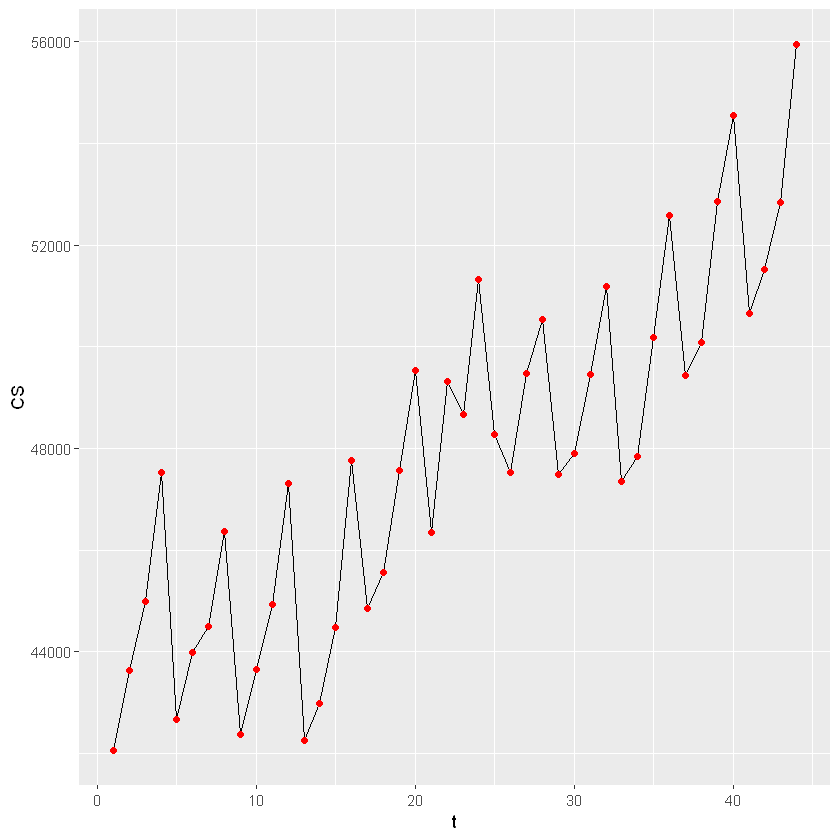

In [5]:
ggplot(ch4bt3_sbt, aes(t,CS)) + geom_line() + geom_point(col = "red")

##### b.  Hãy ước lượng hàm tiêu dùng: $CS= \beta_1 + \beta_2Y + u$

In [6]:
reg1=lm(CS~Y)
summary(reg1)


Call:
lm(formula = CS ~ Y)

Residuals:
    Min      1Q  Median      3Q     Max 
-2861.8 -1015.9  -142.4   666.0  3150.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.988e+03  3.397e+03   0.585    0.562    
Y           8.514e-01  6.302e-02  13.510   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1512 on 42 degrees of freedom
Multiple R-squared:  0.8129,	Adjusted R-squared:  0.8085 
F-statistic: 182.5 on 1 and 42 DF,  p-value: < 2.2e-16


##### c.  Hãy ước lượng hàm tiêu dùng có ảnh hưởng của yếu tố thời vụ

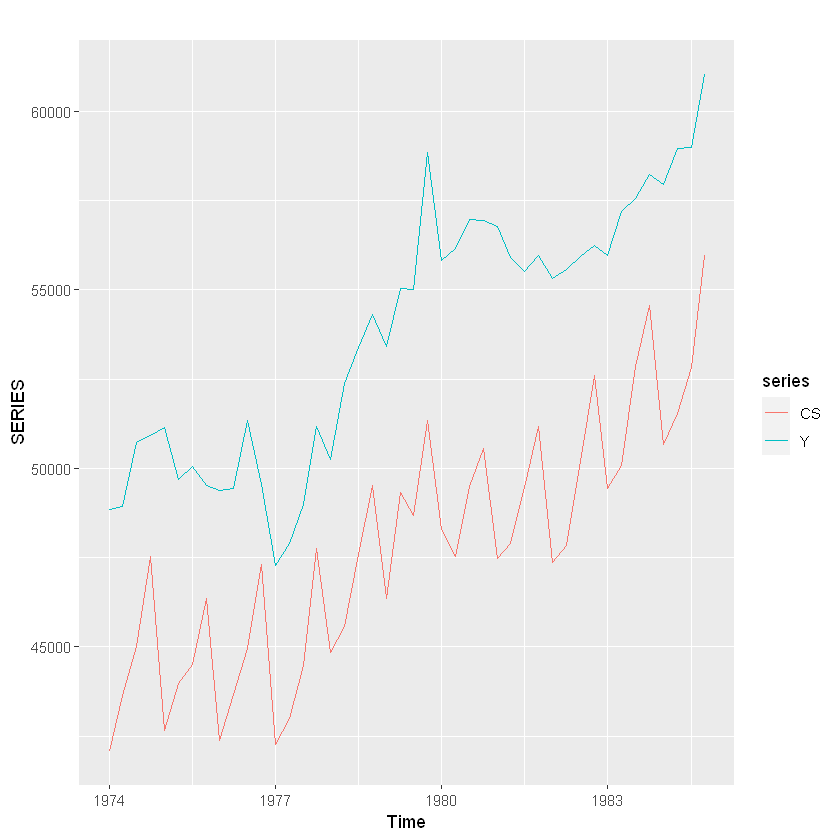

In [7]:
CS=ts(CS, start=c(1974,1), end=c(1984,4),frequency = 4)
Y=ts(Y, start=c(1974,1), end=c(1984,4),frequency = 4)
SERIES=cbind(CS,Y)
autoplot(SERIES)

In [8]:
dum3 = seasonaldummy(SERIES)
d1=ts(dum3[,1],start=c(1974,1),end=c(1984,4),frequency = 4)
d2=ts(dum3[,2],start=c(1974,1),end=c(1984,4),frequency = 4)
d3=ts(dum3[,3],start=c(1974,1),end=c(1984,4),frequency = 4)

reg2=lm(CS~Y+d1+d2+d3)
summary(reg2)


Call:
lm(formula = CS ~ Y + d1 + d2 + d3)

Residuals:
    Min      1Q  Median      3Q     Max 
-2283.2  -555.1   129.7   580.6  1901.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.265e+03  2.254e+03   3.224 0.002556 ** 
Y            7.876e-01  4.079e-02  19.310  < 2e-16 ***
d1          -3.147e+03  4.162e+02  -7.562 3.67e-09 ***
d2          -2.578e+03  4.132e+02  -6.241 2.40e-07 ***
d3          -1.652e+03  4.103e+02  -4.028 0.000252 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 959.5 on 39 degrees of freedom
Multiple R-squared:   0.93,	Adjusted R-squared:  0.9229 
F-statistic: 129.6 on 4 and 39 DF,  p-value: < 2.2e-16


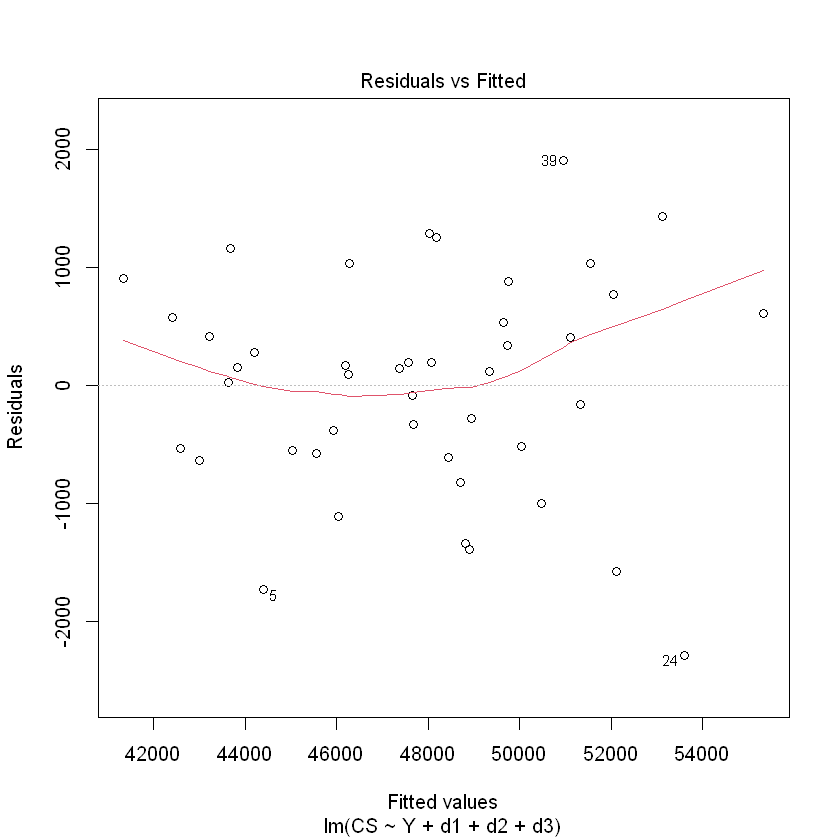

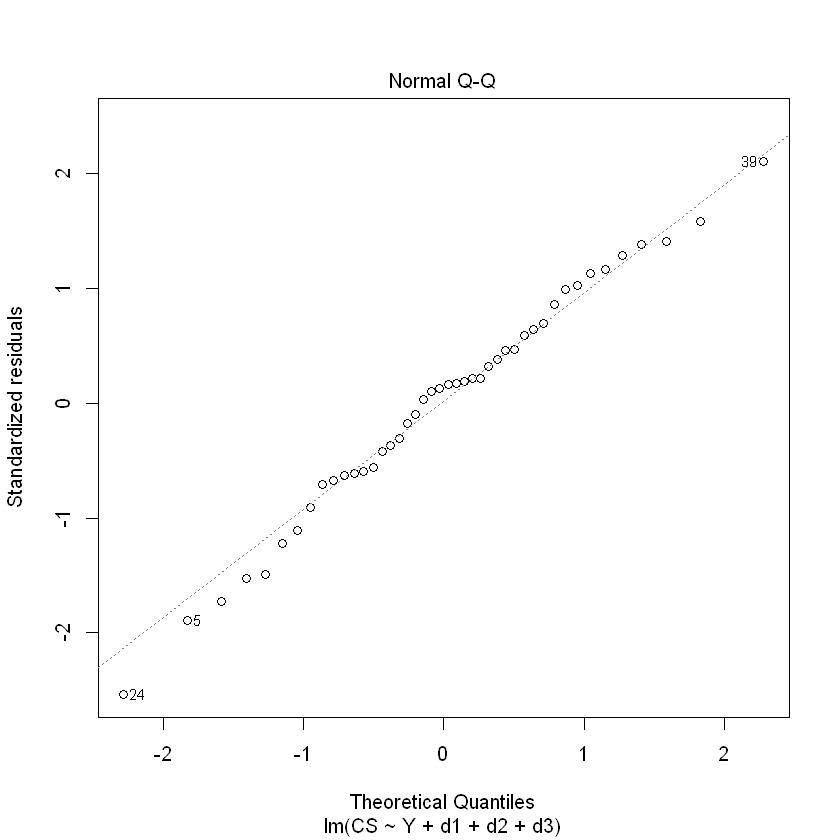

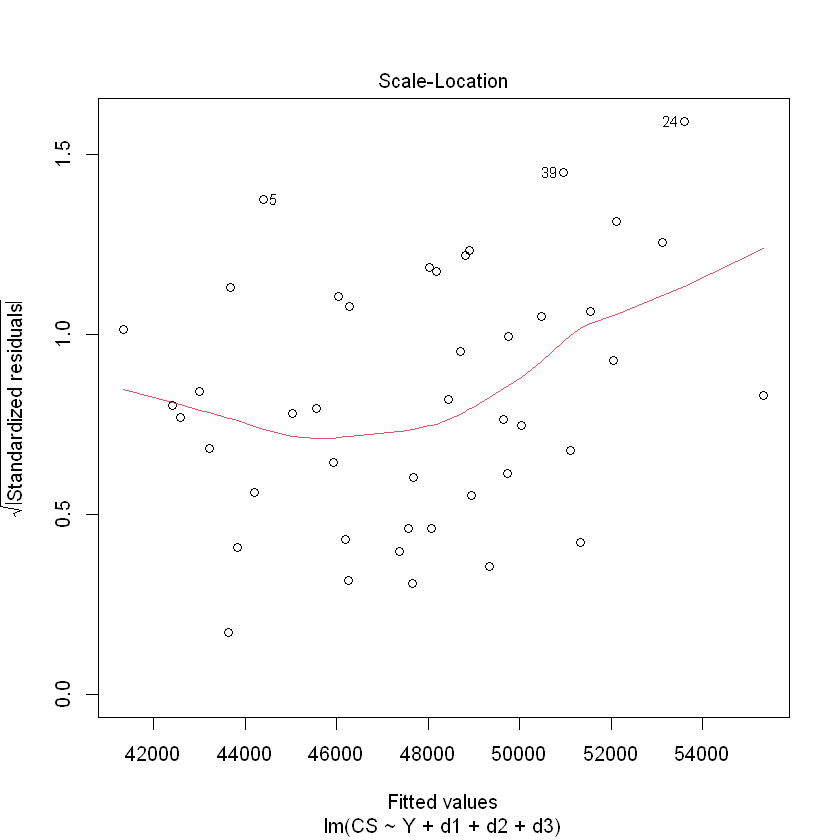

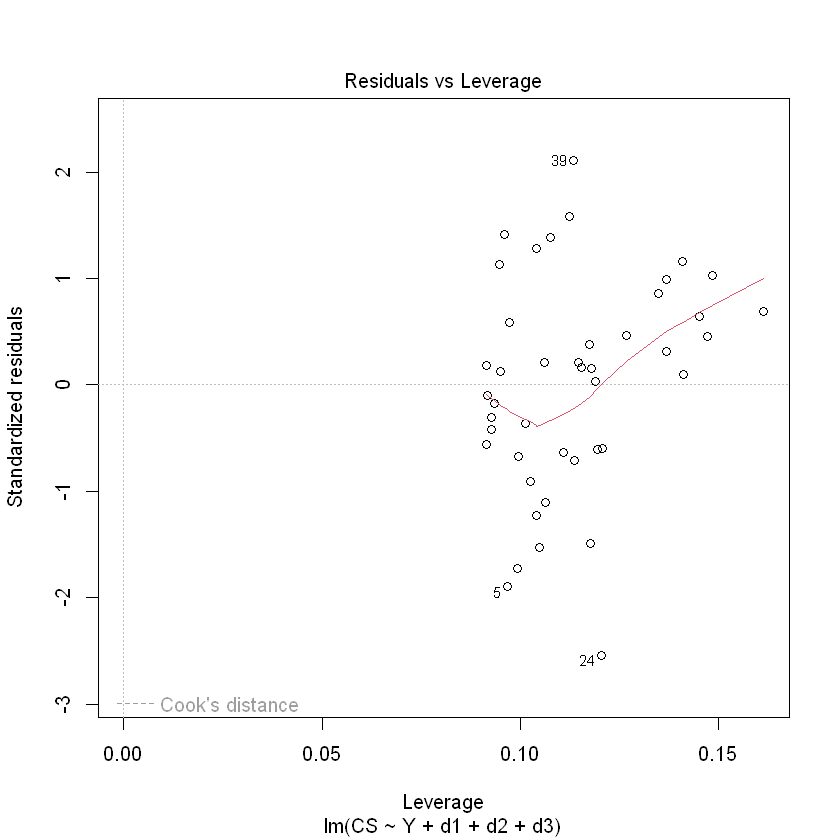

In [9]:
plot(reg2)

In [10]:
myH0=c("d1","d2","d3")
print(linearHypothesis(reg2, myH0))


Linear hypothesis test

Hypothesis:
d1 = 0
d2 = 0
d3 = 0

Model 1: restricted model
Model 2: CS ~ Y + d1 + d2 + d3

  Res.Df      RSS Df Sum of Sq      F    Pr(>F)    
1     42 95983889                                  
2     39 35902165  3  60081724 21.755 1.915e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
